# Assignment
Construct a CNN model (using not more than 6 convolutional and 6 pooling layers) to classify the given dataset of natural scenes. The dataset can be found at https://drive.google.com/drive/folders/1ZcURkfn78cLvLraUkIdUC20_yfHbBhhE?usp=drive_link
The seg_train contains around 14000 images of buildings, forests, glaciers, mountains, sea, and streets. Use 9000 data for training and 3000 data for validation. The seg_test folder contains around 3000 images. Try to reach a high accuracy. Use at least 4 images of each category from the test data and predict the classes of the images. Write the code in Google Colab and run it. Submit the assignment as .ipynb file along with the outputs. The colab file must be named as your roll number.

# Data

## Unzipping

In [ ]:
import zipfile

In [ ]:
train_url = '/content/drive/MyDrive/Data_Science_II_2024/Assignment/seg_train.zip'
test_url = '/content/drive/MyDrive/Data_Science_II_2024/Assignment/seg_test.zip'
folder = '/content/drive/MyDrive/DataScienceII'

In [ ]:
!unzip '/content/drive/MyDrive/Data_Science_II_2024/Assignment/seg_test.zip' -d '/content/drive/MyDrive/DataScienceII'

Archive:  /content/drive/MyDrive/Data_Science_II_2024/Assignment/seg_test.zip


In [ ]:
!unzip '/content/drive/MyDrive/Data_Science_II_2024/Assignment/seg_train.zip' -d '/content/drive/MyDrive/DataScienceII'

Archive:  /content/drive/MyDrive/Data_Science_II_2024/Assignment/seg_train.zip


## Train and validation data

In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#height and width of images
path = '/content/drive/MyDrive/DataScienceII/seg_test/buildings/20057.jpg'
img = cv2.imread(path)
print(img.shape)

(150, 150, 3)


In [ ]:
datadir = '/content/drive/MyDrive/DataScienceII/seg_train'

In [ ]:
#train data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    datadir,
    label_mode = 'categorical',
    batch_size = 33,
    image_size = (150, 150),
    seed = 33,
    validation_split = 0.35,
    subset = 'training'
)

Found 14034 files belonging to 6 classes.
Using 9123 files for training.


In [ ]:
#val data
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    datadir,
    label_mode = 'categorical',
    batch_size = 33,
    image_size = (150, 150),
    seed = 33,
    validation_split = 0.35,
    subset = 'validation'
)

Found 14034 files belonging to 6 classes.
Using 4911 files for validation.


## Test data

In [ ]:
#test data
datadirtest = '/content/drive/MyDrive/DataScienceII/seg_test'

In [ ]:
#test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    datadirtest,
    label_mode = 'categorical',
    batch_size = 33,
    image_size = (150, 150),
    seed = 33
)

Found 3000 files belonging to 6 classes.


## Labels

In [ ]:
classes = train_data.class_names
print('Classes:', classes)
for image_batch, labels_batch in train_data:
  print('Image batch:', image_batch.shape)
  print('Label batch:', labels_batch.shape)
  break

Classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Image batch: (33, 150, 150, 3)
Label batch: (33, 6)


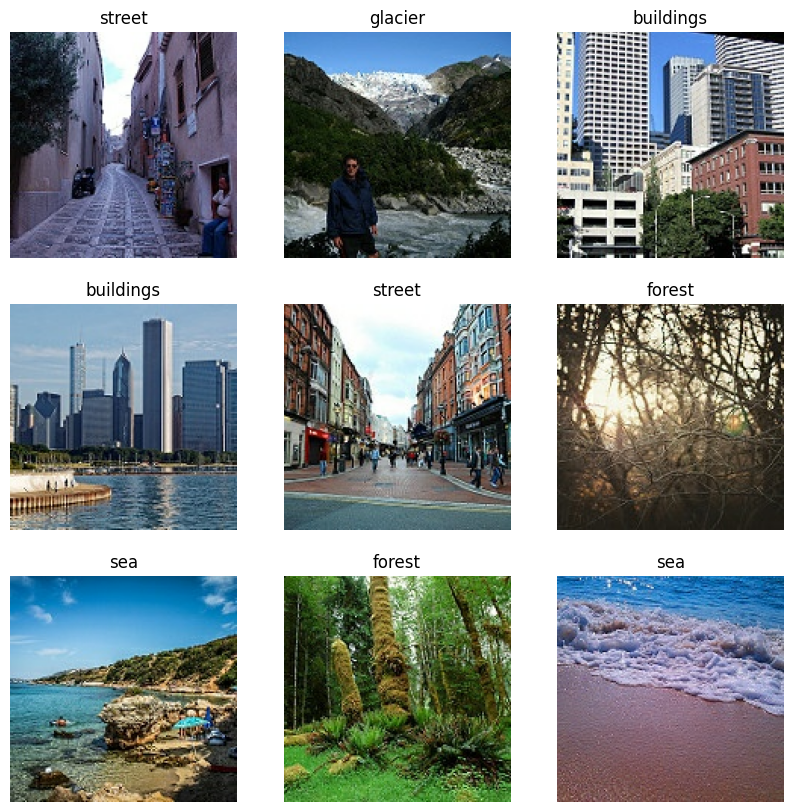

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[tf.argmax(labels[i])])
        plt.axis("off")

plt.show()

# Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
import numpy as np
import os
from google.colab.patches import cv2_imshow

## model1

In [ ]:
model1 = tf.keras.Sequential([
  # rescaling - normalization
  tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),

  #first conv layer
  tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  #second conv layer
  tf.keras.layers.Conv2D(32, (4, 4), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((3, 3)),

  #third conv layer
  tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  #fourth conv layer
  tf.keras.layers.Conv2D(10, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  #flattening
  tf.keras.layers.Flatten(),

  #dense layers
  tf.keras.layers.Dense(124, activation = 'relu'),
  tf.keras.layers.Dense(64, activation = 'relu'),
  tf.keras.layers.Dense(6, activation = 'softmax')
])

model1.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = ['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        4

In [ ]:
#training part 1
history = model1.fit(train_data, validation_data = val_data, epochs = 10, batch_size = 128)

Epoch 1/10
277/277 [==============================] - 445s 2s/step - loss: 1.1680 - accuracy: 0.5202 - val_loss: 0.8871 - val_accuracy: 0.6492
Epoch 2/10
277/277 [==============================] - 411s 1s/step - loss: 0.8639 - accuracy: 0.6646 - val_loss: 0.8006 - val_accuracy: 0.6909
Epoch 3/10
277/277 [==============================] - 432s 2s/step - loss: 0.7610 - accuracy: 0.7181 - val_loss: 0.7504 - val_accuracy: 0.7243
Epoch 4/10
277/277 [==============================] - 427s 2s/step - loss: 0.6761 - accuracy: 0.7512 - val_loss: 0.7334 - val_accuracy: 0.7267
Epoch 5/10
277/277 [==============================] - 432s 2s/step - loss: 0.6222 - accuracy: 0.7741 - val_loss: 0.6776 - val_accuracy: 0.7528
Epoch 6/10
277/277 [==============================] - 427s 2s/step - loss: 0.5745 - accuracy: 0.7898 - val_loss: 0.6190 - val_accuracy: 0.7789
Epoch 7/10
277/277 [==============================] - 427s 2s/step - loss: 0.5448 - accuracy: 0.8032 - val_loss: 0.5828 - val_accuracy: 0.7870

In [ ]:
#training part 2
history2 = model1.fit(train_data, validation_data = val_data, epochs = 5, batch_size = 100)

Epoch 1/5
277/277 [==============================] - 418s 2s/step - loss: 0.4307 - accuracy: 0.8462 - val_loss: 0.6328 - val_accuracy: 0.7862
Epoch 2/5
277/277 [==============================] - 405s 1s/step - loss: 0.3974 - accuracy: 0.8582 - val_loss: 0.6232 - val_accuracy: 0.7888
Epoch 3/5
277/277 [==============================] - 400s 1s/step - loss: 0.3728 - accuracy: 0.8666 - val_loss: 0.6301 - val_accuracy: 0.7986
Epoch 4/5
277/277 [==============================] - 420s 2s/step - loss: 0.3390 - accuracy: 0.8768 - val_loss: 0.6515 - val_accuracy: 0.8002
Epoch 5/5
277/277 [==============================] - 419s 2s/step - loss: 0.3083 - accuracy: 0.8912 - val_loss: 0.6563 - val_accuracy: 0.7880


In [ ]:
#training part 3
history3 = model1.fit(train_data, validation_data = val_data, epochs = 3, batch_size = 250)

Epoch 1/3
277/277 [==============================] - 456s 2s/step - loss: 0.1957 - accuracy: 0.9316 - val_loss: 0.8985 - val_accuracy: 0.7813
Epoch 2/3
277/277 [==============================] - 441s 2s/step - loss: 0.1963 - accuracy: 0.9321 - val_loss: 0.9135 - val_accuracy: 0.7768
Epoch 3/3
277/277 [==============================] - 439s 2s/step - loss: 0.1614 - accuracy: 0.9429 - val_loss: 0.8908 - val_accuracy: 0.7956


In [ ]:
model1.load_weights('/content/drive/MyDrive/DataScienceII/classifier0.h5')

In [ ]:
#evaluating on test data
loss, accuracy = model1.evaluate(test_data)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

91/91 [==============================] - 976s 10s/step - loss: 0.8177 - accuracy: 0.8060
Test Loss: 0.8176693320274353
Test Accuracy: 0.8059999942779541


In [ ]:
#save weights
model1.save_weights('/content/drive/MyDrive/DataScienceII/classifier0.h5')

## model2

In [ ]:
model2 = tf.keras.Sequential([
  # rescaling - normalization
  tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),

  #first conv layer
  tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  #second conv layer
  tf.keras.layers.Conv2D(32, (4, 4), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  #third conv layer
  tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  #fourth conv layer
  tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  #flattening
  tf.keras.layers.Flatten(),

  #dense layers
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(6, activation = 'softmax')
])

model2.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = ['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 32)        16416     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 35, 35, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 33, 33, 32)       

In [ ]:
model2.load_weights('/content/drive/MyDrive/DataScienceII/classifier2.h5')

In [ ]:
his1 = model2.fit(train_data, validation_data = val_data, epochs = 3, batch_size = 100)

Epoch 1/3
277/277 [==============================] - 440s 2s/step - loss: 1.1503 - accuracy: 0.5370 - val_loss: 0.9571 - val_accuracy: 0.6017
Epoch 2/3
277/277 [==============================] - 490s 2s/step - loss: 0.9012 - accuracy: 0.6417 - val_loss: 0.9457 - val_accuracy: 0.6477
Epoch 3/3
277/277 [==============================] - 501s 2s/step - loss: 0.7421 - accuracy: 0.7149 - val_loss: 0.7041 - val_accuracy: 0.7371


In [ ]:
his2 = model2.fit(train_data, validation_data = val_data, epochs = 3, batch_size = 100)

Epoch 1/3
277/277 [==============================] - 469s 2s/step - loss: 0.6506 - accuracy: 0.7607 - val_loss: 0.6930 - val_accuracy: 0.7337
Epoch 2/3
277/277 [==============================] - 503s 2s/step - loss: 0.5754 - accuracy: 0.7890 - val_loss: 0.5634 - val_accuracy: 0.7994
Epoch 3/3
277/277 [==============================] - 501s 2s/step - loss: 0.5151 - accuracy: 0.8133 - val_loss: 0.6083 - val_accuracy: 0.7783


In [ ]:
his3 = model2.fit(train_data, validation_data = val_data, epochs = 2, batch_size = 88)

Epoch 1/2
277/277 [==============================] - 4073s 14s/step - loss: 0.4849 - accuracy: 0.8187 - val_loss: 0.5249 - val_accuracy: 0.8090
Epoch 2/2
277/277 [==============================] - 406s 1s/step - loss: 0.4393 - accuracy: 0.8422 - val_loss: 0.5429 - val_accuracy: 0.8027


In [ ]:
#save weights
model2.save_weights('/content/drive/MyDrive/DataScienceII/classifier2.h5')

In [ ]:
#evaluating on test data
loss, accuracy = model2.evaluate(test_data)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

91/91 [==============================] - 1034s 10s/step - loss: 0.5269 - accuracy: 0.8063
Test Loss: 0.526898205280304
Test Accuracy: 0.8063333630561829


## model3

In [ ]:
model3 = tf.keras.Sequential([
  # rescaling - normalization
  tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),

  #first conv layer
  tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  #second conv layer
  tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  #third conv layer
  tf.keras.layers.Conv2D(32, (2, 2), activation = 'relu', dilation_rate = 2),

  #fourth conv layer
  tf.keras.layers.Conv2D(24, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  #fifth conv layer
  tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),

  #flattening
  tf.keras.layers.Flatten(),

  #dense layers
  tf.keras.layers.Dense(150, activation = 'relu'),
  tf.keras.layers.Dense(6, activation = 'softmax')
])

model3.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        4

In [ ]:
hist1 = model3.fit(train_data, validation_data = val_data, epochs = 3, batch_size = 150)

Epoch 1/3
277/277 [==============================] - 1621s 6s/step - loss: 1.1077 - accuracy: 0.5532 - val_loss: 0.8708 - val_accuracy: 0.6620
Epoch 2/3
277/277 [==============================] - 49s 174ms/step - loss: 0.8532 - accuracy: 0.6773 - val_loss: 0.7851 - val_accuracy: 0.7019
Epoch 3/3
277/277 [==============================] - 45s 160ms/step - loss: 0.7187 - accuracy: 0.7328 - val_loss: 0.6846 - val_accuracy: 0.7418


In [ ]:
hist2 = model3.fit(train_data, validation_data = val_data, epochs = 3, batch_size = 100)

Epoch 1/3
277/277 [==============================] - 51s 181ms/step - loss: 0.6184 - accuracy: 0.7718 - val_loss: 0.6340 - val_accuracy: 0.7752
Epoch 2/3
277/277 [==============================] - 52s 184ms/step - loss: 0.5518 - accuracy: 0.7990 - val_loss: 0.6349 - val_accuracy: 0.7762
Epoch 3/3
277/277 [==============================] - 51s 181ms/step - loss: 0.4873 - accuracy: 0.8254 - val_loss: 0.5597 - val_accuracy: 0.7988


In [ ]:
hist3 = model3.fit(train_data, validation_data = val_data, epochs = 3, batch_size = 100)

Epoch 1/3
277/277 [==============================] - 53s 189ms/step - loss: 0.4317 - accuracy: 0.8471 - val_loss: 0.6268 - val_accuracy: 0.7793
Epoch 2/3
277/277 [==============================] - 51s 182ms/step - loss: 0.3905 - accuracy: 0.8590 - val_loss: 0.6098 - val_accuracy: 0.8033
Epoch 3/3
277/277 [==============================] - 50s 177ms/step - loss: 0.3315 - accuracy: 0.8800 - val_loss: 0.6928 - val_accuracy: 0.7952


In [ ]:
hist4 = model3.fit(train_data, validation_data = val_data, epochs = 4, batch_size = 64)

Epoch 1/4
277/277 [==============================] - 48s 170ms/step - loss: 0.2837 - accuracy: 0.8963 - val_loss: 0.6250 - val_accuracy: 0.8076
Epoch 2/4
277/277 [==============================] - 46s 164ms/step - loss: 0.2336 - accuracy: 0.9164 - val_loss: 0.7510 - val_accuracy: 0.7931
Epoch 3/4
277/277 [==============================] - 46s 165ms/step - loss: 0.1999 - accuracy: 0.9272 - val_loss: 0.8555 - val_accuracy: 0.7793
Epoch 4/4
277/277 [==============================] - 47s 167ms/step - loss: 0.1893 - accuracy: 0.9332 - val_loss: 0.8279 - val_accuracy: 0.7933


In [ ]:
#save weights
model3.save_weights('/content/drive/MyDrive/DataScienceII/classifier3.h5')

In [ ]:
#load weights
model3.load_weights('/content/drive/MyDrive/DataScienceII/classifier3.h5')

In [ ]:
#evaluating on test data
loss, accuracy = model3.evaluate(test_data)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

91/91 [==============================] - 10s 96ms/step - loss: 0.8446 - accuracy: 0.7880
Test Loss: 0.8446096777915955
Test Accuracy: 0.7879999876022339


## examples

In [ ]:
class_names = test_data.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
# subdirectories path for each class
dir = '/content/drive/MyDrive/DataScienceII/seg_test/'
subdir = [os.path.join(dir, d) for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
sublist = []
for sub in subdir:
  sublist.append(sub)
sublist

['/content/drive/MyDrive/DataScienceII/seg_test/street',
 '/content/drive/MyDrive/DataScienceII/seg_test/sea',
 '/content/drive/MyDrive/DataScienceII/seg_test/glacier',
 '/content/drive/MyDrive/DataScienceII/seg_test/forest',
 '/content/drive/MyDrive/DataScienceII/seg_test/mountain',
 '/content/drive/MyDrive/DataScienceII/seg_test/buildings']

In [ ]:
# get 7 examples from each class
def get_image_paths(dir):
    image_paths = []
    files = os.listdir(dir)
    for i in range(7):
        image_paths.append(os.path.join(dir, files[i]))
    return image_paths

### predictions - model1

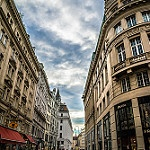

1/1 [==============================] - 0s 28ms/step
Actual Class: street
Predicted Class: street


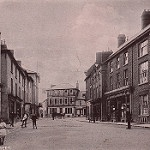

1/1 [==============================] - 0s 26ms/step
Actual Class: street
Predicted Class: buildings


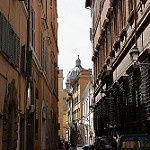

1/1 [==============================] - 0s 27ms/step
Actual Class: street
Predicted Class: street


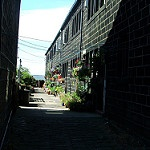

1/1 [==============================] - 0s 25ms/step
Actual Class: street
Predicted Class: street


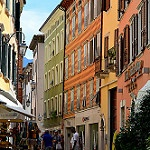

1/1 [==============================] - 0s 27ms/step
Actual Class: street
Predicted Class: forest


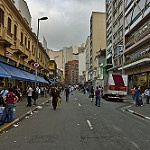

1/1 [==============================] - 0s 54ms/step
Actual Class: street
Predicted Class: street


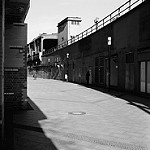

1/1 [==============================] - 0s 27ms/step
Actual Class: street
Predicted Class: street


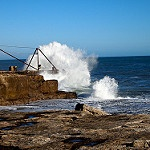

1/1 [==============================] - 0s 27ms/step
Actual Class: sea
Predicted Class: sea


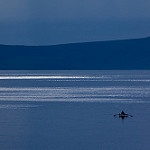

1/1 [==============================] - 0s 27ms/step
Actual Class: sea
Predicted Class: sea


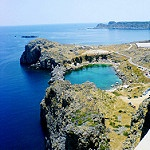

1/1 [==============================] - 0s 26ms/step
Actual Class: sea
Predicted Class: sea


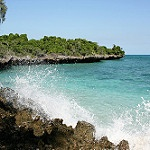

1/1 [==============================] - 0s 25ms/step
Actual Class: sea
Predicted Class: mountain


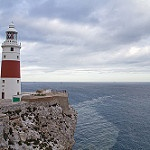

1/1 [==============================] - 0s 29ms/step
Actual Class: sea
Predicted Class: sea


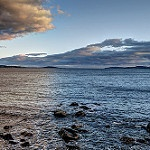

1/1 [==============================] - 0s 47ms/step
Actual Class: sea
Predicted Class: sea


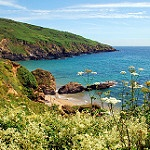

1/1 [==============================] - 0s 30ms/step
Actual Class: sea
Predicted Class: sea


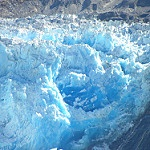

1/1 [==============================] - 0s 26ms/step
Actual Class: glacier
Predicted Class: sea


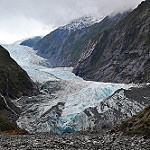

1/1 [==============================] - 0s 25ms/step
Actual Class: glacier
Predicted Class: glacier


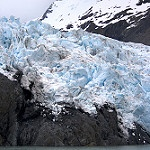

1/1 [==============================] - 0s 25ms/step
Actual Class: glacier
Predicted Class: forest


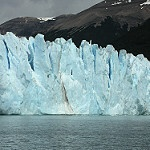

1/1 [==============================] - 0s 27ms/step
Actual Class: glacier
Predicted Class: sea


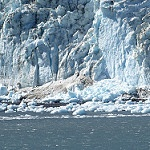

1/1 [==============================] - 0s 27ms/step
Actual Class: glacier
Predicted Class: forest


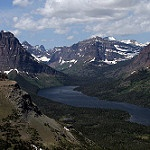

1/1 [==============================] - 0s 44ms/step
Actual Class: glacier
Predicted Class: sea


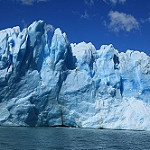

1/1 [==============================] - 0s 104ms/step
Actual Class: glacier
Predicted Class: sea


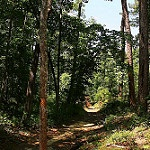

1/1 [==============================] - 0s 97ms/step
Actual Class: forest
Predicted Class: forest


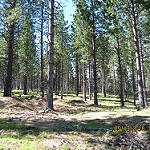

1/1 [==============================] - 0s 107ms/step
Actual Class: forest
Predicted Class: forest


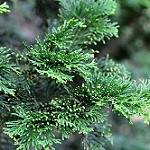

1/1 [==============================] - 0s 77ms/step
Actual Class: forest
Predicted Class: forest


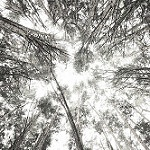

1/1 [==============================] - 0s 105ms/step
Actual Class: forest
Predicted Class: glacier


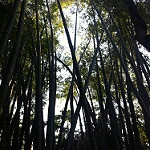

1/1 [==============================] - 0s 34ms/step
Actual Class: forest
Predicted Class: forest


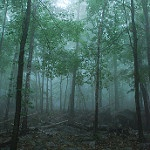

1/1 [==============================] - 0s 28ms/step
Actual Class: forest
Predicted Class: forest


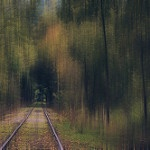

1/1 [==============================] - 0s 37ms/step
Actual Class: forest
Predicted Class: sea


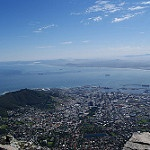

1/1 [==============================] - 0s 38ms/step
Actual Class: mountain
Predicted Class: mountain


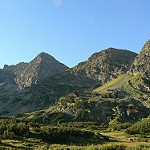

1/1 [==============================] - 0s 70ms/step
Actual Class: mountain
Predicted Class: mountain


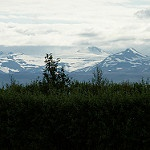

1/1 [==============================] - 0s 52ms/step
Actual Class: mountain
Predicted Class: sea


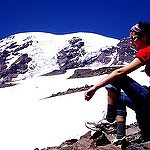

1/1 [==============================] - 0s 42ms/step
Actual Class: mountain
Predicted Class: glacier


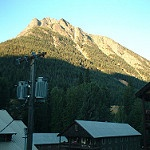

1/1 [==============================] - 0s 91ms/step
Actual Class: mountain
Predicted Class: mountain


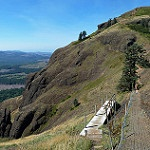

1/1 [==============================] - 0s 109ms/step
Actual Class: mountain
Predicted Class: glacier


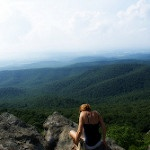

1/1 [==============================] - 0s 27ms/step
Actual Class: mountain
Predicted Class: mountain


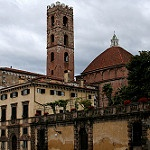

1/1 [==============================] - 0s 41ms/step
Actual Class: buildings
Predicted Class: buildings


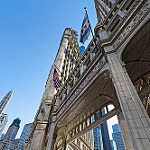

1/1 [==============================] - 0s 58ms/step
Actual Class: buildings
Predicted Class: sea


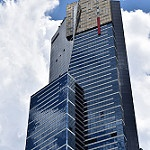

1/1 [==============================] - 0s 40ms/step
Actual Class: buildings
Predicted Class: buildings


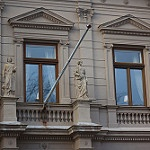

1/1 [==============================] - 0s 43ms/step
Actual Class: buildings
Predicted Class: buildings


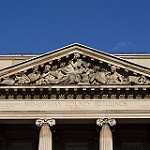

1/1 [==============================] - 0s 60ms/step
Actual Class: buildings
Predicted Class: sea


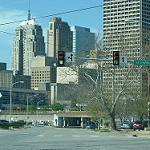

1/1 [==============================] - 0s 27ms/step
Actual Class: buildings
Predicted Class: street


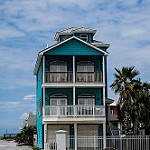

1/1 [==============================] - 0s 52ms/step
Actual Class: buildings
Predicted Class: buildings


In [ ]:
#predictions - model 1
for i in sublist:
  image_paths = get_image_paths(i)
  for img_path in image_paths:
    img = cv2.imread(img_path)
    cv2_imshow(img)
    img = cv2.resize(img, (150, 150))
    img = np.expand_dims(img, axis=0)
    pred = model1.predict(img)
    pred_index = np.argmax(pred[0])
    class_label = class_names[pred_index]

    print("Actual Class:", os.path.basename(i))
    print("Predicted Class:", class_label)

### predictions - model2

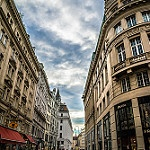

1/1 [==============================] - 0s 99ms/step
Actual Class: street
Predicted Class: street


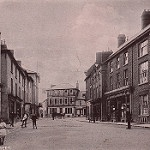

1/1 [==============================] - 0s 27ms/step
Actual Class: street
Predicted Class: street


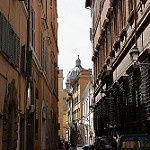

1/1 [==============================] - 0s 26ms/step
Actual Class: street
Predicted Class: street


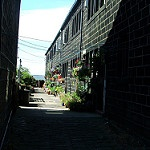

1/1 [==============================] - 0s 28ms/step
Actual Class: street
Predicted Class: street


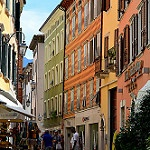

1/1 [==============================] - 0s 26ms/step
Actual Class: street
Predicted Class: street


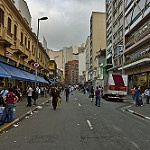

1/1 [==============================] - 0s 25ms/step
Actual Class: street
Predicted Class: street


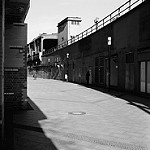

1/1 [==============================] - 0s 30ms/step
Actual Class: street
Predicted Class: street


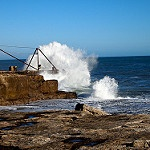

1/1 [==============================] - 0s 27ms/step
Actual Class: sea
Predicted Class: sea


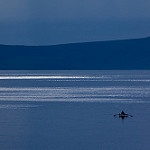

1/1 [==============================] - 0s 26ms/step
Actual Class: sea
Predicted Class: sea


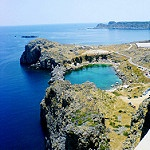

1/1 [==============================] - 0s 25ms/step
Actual Class: sea
Predicted Class: sea


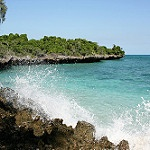

1/1 [==============================] - 0s 25ms/step
Actual Class: sea
Predicted Class: sea


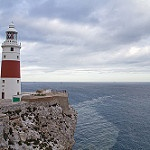

1/1 [==============================] - 0s 26ms/step
Actual Class: sea
Predicted Class: sea


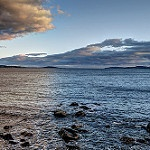

1/1 [==============================] - 0s 27ms/step
Actual Class: sea
Predicted Class: sea


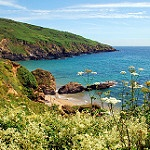

1/1 [==============================] - 0s 67ms/step
Actual Class: sea
Predicted Class: sea


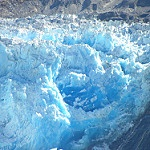

1/1 [==============================] - 0s 41ms/step
Actual Class: glacier
Predicted Class: forest


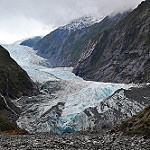

1/1 [==============================] - 0s 60ms/step
Actual Class: glacier
Predicted Class: glacier


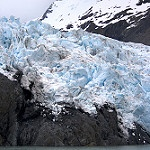

1/1 [==============================] - 0s 52ms/step
Actual Class: glacier
Predicted Class: glacier


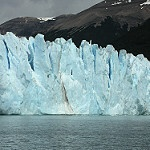

1/1 [==============================] - 0s 50ms/step
Actual Class: glacier
Predicted Class: street


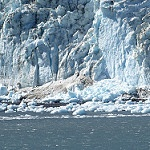

1/1 [==============================] - 0s 27ms/step
Actual Class: glacier
Predicted Class: forest


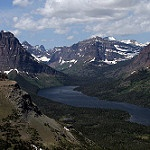

1/1 [==============================] - 0s 24ms/step
Actual Class: glacier
Predicted Class: mountain


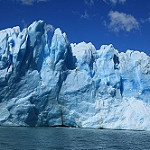

1/1 [==============================] - 0s 26ms/step
Actual Class: glacier
Predicted Class: street


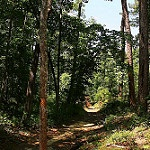

1/1 [==============================] - 0s 51ms/step
Actual Class: forest
Predicted Class: forest


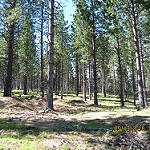

1/1 [==============================] - 0s 50ms/step
Actual Class: forest
Predicted Class: forest


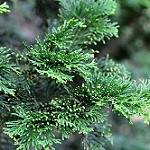

1/1 [==============================] - 0s 49ms/step
Actual Class: forest
Predicted Class: forest


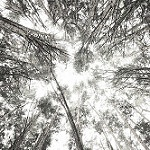

1/1 [==============================] - 0s 36ms/step
Actual Class: forest
Predicted Class: glacier


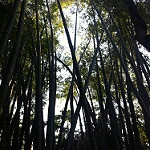

1/1 [==============================] - 0s 49ms/step
Actual Class: forest
Predicted Class: forest


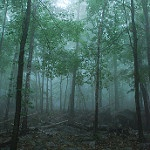

1/1 [==============================] - 0s 65ms/step
Actual Class: forest
Predicted Class: forest


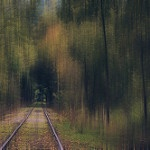

1/1 [==============================] - 0s 49ms/step
Actual Class: forest
Predicted Class: street


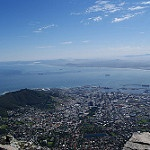

1/1 [==============================] - 0s 47ms/step
Actual Class: mountain
Predicted Class: mountain


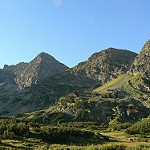

1/1 [==============================] - 0s 57ms/step
Actual Class: mountain
Predicted Class: mountain


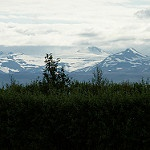

1/1 [==============================] - 0s 50ms/step
Actual Class: mountain
Predicted Class: mountain


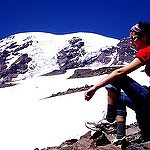

1/1 [==============================] - 0s 42ms/step
Actual Class: mountain
Predicted Class: glacier


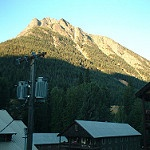

1/1 [==============================] - 0s 71ms/step
Actual Class: mountain
Predicted Class: mountain


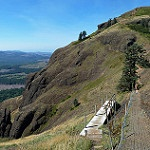

1/1 [==============================] - 0s 39ms/step
Actual Class: mountain
Predicted Class: glacier


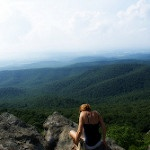

1/1 [==============================] - 0s 47ms/step
Actual Class: mountain
Predicted Class: mountain


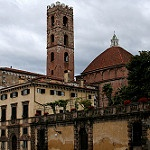

1/1 [==============================] - 0s 47ms/step
Actual Class: buildings
Predicted Class: buildings


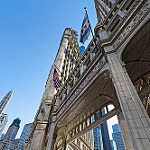

1/1 [==============================] - 0s 51ms/step
Actual Class: buildings
Predicted Class: buildings


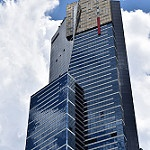

1/1 [==============================] - 0s 46ms/step
Actual Class: buildings
Predicted Class: buildings


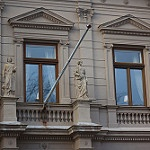

1/1 [==============================] - 0s 70ms/step
Actual Class: buildings
Predicted Class: buildings


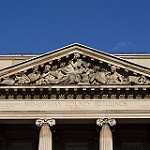

1/1 [==============================] - 0s 63ms/step
Actual Class: buildings
Predicted Class: sea


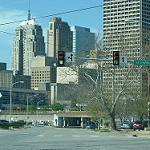

1/1 [==============================] - 0s 54ms/step
Actual Class: buildings
Predicted Class: buildings


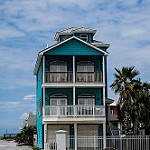

1/1 [==============================] - 0s 65ms/step
Actual Class: buildings
Predicted Class: buildings


In [ ]:
#predictions - model 2
for i in sublist:
  image_paths = get_image_paths(i)
  for img_path in image_paths:
    img = cv2.imread(img_path)
    cv2_imshow(img)
    img = cv2.resize(img, (150, 150))
    img = np.expand_dims(img, axis=0)
    pred = model2.predict(img)
    pred_index = np.argmax(pred[0])
    class_label = class_names[pred_index]

    print("Actual Class:", os.path.basename(i))
    print("Predicted Class:", class_label)

### predictions - model3

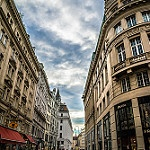

1/1 [==============================] - 0s 435ms/step
Actual Class: street
Predicted Class: street


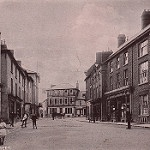

1/1 [==============================] - 0s 22ms/step
Actual Class: street
Predicted Class: buildings


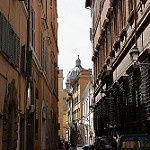

1/1 [==============================] - 0s 21ms/step
Actual Class: street
Predicted Class: street


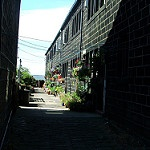

1/1 [==============================] - 0s 20ms/step
Actual Class: street
Predicted Class: street


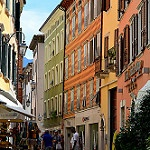

1/1 [==============================] - 0s 21ms/step
Actual Class: street
Predicted Class: buildings


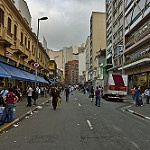

1/1 [==============================] - 0s 46ms/step
Actual Class: street
Predicted Class: street


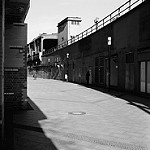

1/1 [==============================] - 0s 21ms/step
Actual Class: street
Predicted Class: street


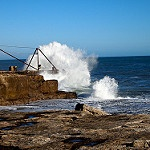

1/1 [==============================] - 0s 32ms/step
Actual Class: sea
Predicted Class: sea


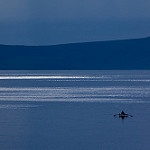

1/1 [==============================] - 0s 32ms/step
Actual Class: sea
Predicted Class: sea


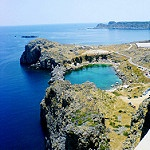

1/1 [==============================] - 0s 30ms/step
Actual Class: sea
Predicted Class: sea


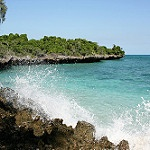

1/1 [==============================] - 0s 31ms/step
Actual Class: sea
Predicted Class: sea


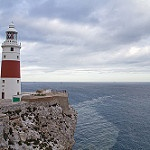

1/1 [==============================] - 0s 34ms/step
Actual Class: sea
Predicted Class: sea


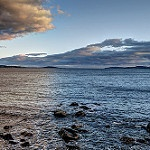

1/1 [==============================] - 0s 63ms/step
Actual Class: sea
Predicted Class: sea


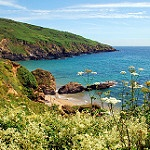

1/1 [==============================] - 0s 42ms/step
Actual Class: sea
Predicted Class: mountain


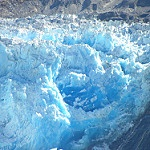

1/1 [==============================] - 0s 37ms/step
Actual Class: glacier
Predicted Class: sea


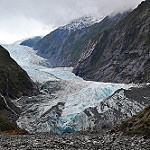

1/1 [==============================] - 0s 29ms/step
Actual Class: glacier
Predicted Class: glacier


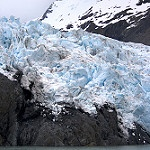

1/1 [==============================] - 0s 32ms/step
Actual Class: glacier
Predicted Class: glacier


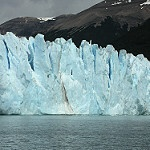

1/1 [==============================] - 0s 37ms/step
Actual Class: glacier
Predicted Class: street


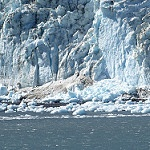

1/1 [==============================] - 0s 29ms/step
Actual Class: glacier
Predicted Class: forest


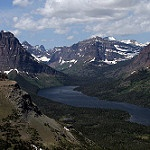

1/1 [==============================] - 0s 37ms/step
Actual Class: glacier
Predicted Class: mountain


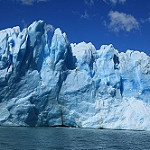

1/1 [==============================] - 0s 20ms/step
Actual Class: glacier
Predicted Class: street


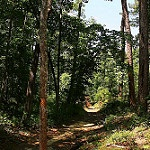

1/1 [==============================] - 0s 26ms/step
Actual Class: forest
Predicted Class: forest


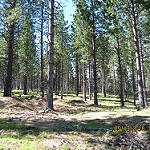

1/1 [==============================] - 0s 21ms/step
Actual Class: forest
Predicted Class: forest


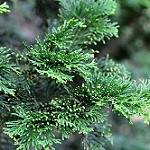

1/1 [==============================] - 0s 31ms/step
Actual Class: forest
Predicted Class: glacier


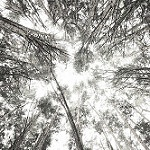

1/1 [==============================] - 0s 27ms/step
Actual Class: forest
Predicted Class: forest


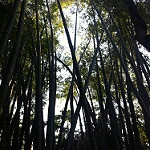

1/1 [==============================] - 0s 76ms/step
Actual Class: forest
Predicted Class: forest


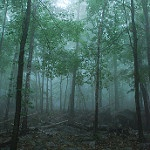

1/1 [==============================] - 0s 19ms/step
Actual Class: forest
Predicted Class: forest


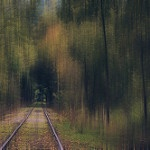

1/1 [==============================] - 0s 27ms/step
Actual Class: forest
Predicted Class: street


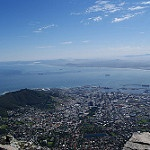

1/1 [==============================] - 0s 22ms/step
Actual Class: mountain
Predicted Class: sea


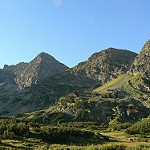

1/1 [==============================] - 0s 29ms/step
Actual Class: mountain
Predicted Class: mountain


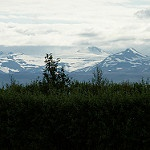

1/1 [==============================] - 0s 24ms/step
Actual Class: mountain
Predicted Class: mountain


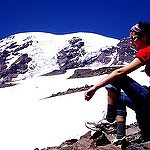

1/1 [==============================] - 0s 32ms/step
Actual Class: mountain
Predicted Class: glacier


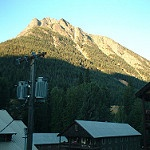

1/1 [==============================] - 0s 41ms/step
Actual Class: mountain
Predicted Class: mountain


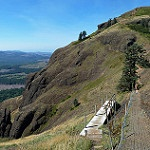

1/1 [==============================] - 0s 57ms/step
Actual Class: mountain
Predicted Class: glacier


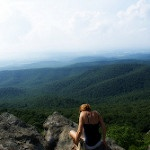

1/1 [==============================] - 0s 21ms/step
Actual Class: mountain
Predicted Class: mountain


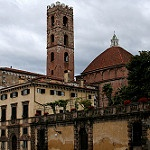

1/1 [==============================] - 0s 30ms/step
Actual Class: buildings
Predicted Class: buildings


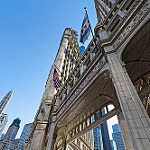

1/1 [==============================] - 0s 29ms/step
Actual Class: buildings
Predicted Class: buildings


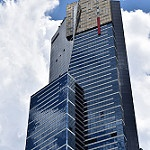

1/1 [==============================] - 0s 30ms/step
Actual Class: buildings
Predicted Class: buildings


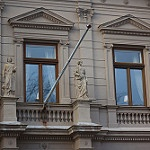

1/1 [==============================] - 0s 45ms/step
Actual Class: buildings
Predicted Class: buildings


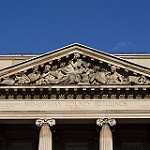

1/1 [==============================] - 0s 33ms/step
Actual Class: buildings
Predicted Class: buildings


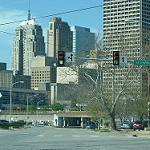

1/1 [==============================] - 0s 20ms/step
Actual Class: buildings
Predicted Class: street


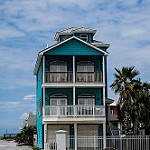

1/1 [==============================] - 0s 44ms/step
Actual Class: buildings
Predicted Class: buildings


In [ ]:
#predictions - model 3
for i in sublist:
  image_paths = get_image_paths(i)
  for img_path in image_paths:
    img = cv2.imread(img_path)
    cv2_imshow(img)
    img = cv2.resize(img, (150, 150))
    img = np.expand_dims(img, axis=0)
    pred = model3.predict(img)
    pred_index = np.argmax(pred[0])
    class_label = class_names[pred_index]

    print("Actual Class:", os.path.basename(i))
    print("Predicted Class:", class_label)

# Summary

Out of the three models, model 2 performs better than the other two. The less accuracy value may be due to the noise in the dataset - some images can be classified into two classes(the differentiating factor is not clear in cases of certain images - eg. glaciers vs mountains, streets vs buildings, sea vs mountains, etc). For better accuracy, additional CNN layers can be used - modify model architecture.

